# YOLO is a neural network (You only look once)
## It can be used for object detection during training of machine learning models.


In [6]:
from ultralytics import YOLO

## YOLOv8 is a gorup of convolutional neural network models, created and trained using the PyTorch framework.


In [7]:
model = YOLO("yolov8m.pt")

##### train({path to daatset descriptor file}) used to train the model of images on dataset
##### predict({image}) used to make prediction for a specified image e.g detecting bounds of obejcts where the mdoel can find in the image
##### export({format}) used to export the mdoel from the pyTorch format to a specified format


### Sample image of cat and dog to be used on model

![](cat_dog.jpg)

In [8]:
#predict can accept many data types from singel images to arrays 
#of file paths

results = model.predict("cat_dog.jpg")


image 1/1 C:\Users\HP\Documents\code_projects\warwzrd\YOLO_model\cat_dog.jpg: 448x640 1 cat, 1 dog, 908.6ms
Speed: 10.0ms preprocess, 908.6ms inference, 5.0ms postprocess per image at shape (1, 3, 448, 640)


In [9]:
# result contains detected objects. The most important is the boxes array
# which talks about the bouding boxes in the image.

result = results[0]
result

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
keys: ['boxes']
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58:

In [10]:
#We can determine the number of boxes with the len function.
len(result.boxes)

2

In [22]:
box = result.boxes[0]
box

WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


ultralytics.engine.results.Boxes object with attributes:

boxes: tensor([[261.0996,  94.0881, 460.9550, 313.6855,   0.9450,  16.0000]])
cls: tensor([16.])
conf: tensor([0.9450])
data: tensor([[261.0996,  94.0881, 460.9550, 313.6855,   0.9450,  16.0000]])
id: None
is_track: False
orig_shape: (415, 612)
shape: torch.Size([1, 6])
xywh: tensor([[361.0273, 203.8868, 199.8554, 219.5974]])
xywhn: tensor([[0.5899, 0.4913, 0.3266, 0.5292]])
xyxy: tensor([[261.0996,  94.0881, 460.9550, 313.6855]])
xyxyn: tensor([[0.4266, 0.2267, 0.7532, 0.7559]])

####    xyxy – the coordinates of the box as an array [x1,y1,x2,y2]                           
#### cls – the ID of object type
####    conf – the confidence level of the model about this object. If it's very low, like < 0.5, then you can just ignore the box.

In [12]:
#print the info
#add the index i.e[0] when calling attribute as it's still an array

print("Object type:", box.cls[0])
print("Coordinates:", box.xyxy[0])
print("Probability:", box.conf[0])

Object type: tensor(16.)
Coordinates: tensor([261.0996,  94.0881, 460.9550, 313.6855])
Probability: tensor(0.9450)


In [17]:
# used .tolist() and .toitem() methods to remove tensor property
# rounded digits for better representation

cords = box.xyxy[0].tolist()
cords = [round(x) for x in cords]
class_id = result.names[box.cls[0].item()]
conf = round(box.conf[0].item(), 2)

print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: dog
Coordinates: [261, 94, 461, 314]
Probability: 0.94


In [23]:
for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)

    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("----")


Object type: dog
Coordinates: [261, 94, 461, 314]
Probability: 0.94
----
Object type: cat
Coordinates: [140, 170, 256, 315]
Probability: 0.91
----


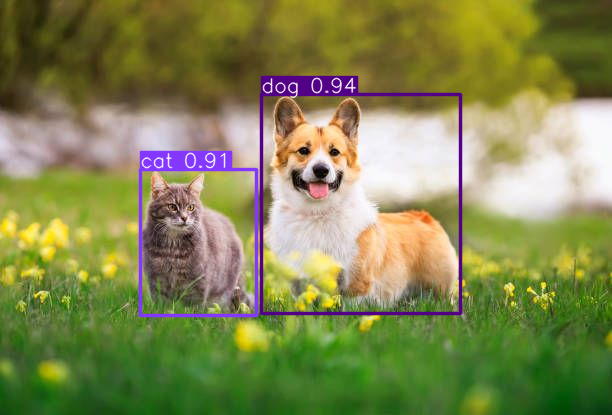

In [34]:
from PIL import Image
Image.fromarray(result.plot()[:,:,::-1])